In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\test\anaconda3\envs\may2\lib\site-packages (0.0)


In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd

 ## Read the CSV and Perform Basic Data Cleaning    

In [4]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


## Select your features (columns)     

In [5]:
# Set features. This will also be used as your x values.
X = df.drop(columns='koi_disposition')
y = df['koi_disposition']

In [6]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10)

[0.13696941 0.16542506 0.13026331 0.05195698 0.01824965 0.01368956
 0.01330176 0.01306466 0.02027944 0.02311744 0.01211244 0.01256751
 0.00965775 0.01819777 0.02825345 0.02721154 0.02091009 0.01350677
 0.01224317 0.01250042 0.01090361 0.01022807 0.01261663 0.00878672
 0.00904674 0.00889833 0.03182    0.00986459 0.01093511 0.02063218
 0.01702644 0.01080882 0.01039035 0.01432103 0.00891585 0.01032916
 0.00949527 0.01094755 0.01032659 0.01022876]


koi_fpflag_ss        0.165425
koi_fpflag_nt        0.136969
koi_fpflag_co        0.130263
koi_fpflag_ec        0.051957
koi_model_snr        0.031820
koi_duration_err1    0.028253
koi_duration_err2    0.027212
koi_time0bk_err2     0.023117
koi_depth            0.020910
koi_steff_err1       0.020632
dtype: float64

In [7]:
Xsel = df[['koi_fpflag_ss', 'koi_fpflag_nt', 'koi_fpflag_co', 'koi_fpflag_ec',  'koi_steff_err2',
          'koi_model_snr', 'koi_duration_err1', 'koi_depth', 'koi_time0bk_err2','koi_time0bk_err1']]
Xsel

,koi_fpflag_ss,koi_fpflag_nt,koi_fpflag_co,koi_fpflag_ec,koi_steff_err2,koi_model_snr,koi_duration_err1,koi_depth,koi_time0bk_err2,koi_time0bk_err1
0,0,0,0,0,-81,25.8,0.11600,874.8,-0.003520,0.003520
1,1,0,0,0,-176,76.3,0.03410,10829.0,-0.000581,0.000581
2,1,0,0,0,-174,505.6,0.00537,8079.2,-0.000115,0.000115
3,0,0,0,0,-211,40.9,0.04200,603.3,-0.001130,0.001130
4,0,0,0,0,-232,40.2,0.06730,686.0,-0.001900,0.001900
...,...,...,...,...,...,...,...,...,...,...
6986,0,0,0,1,-152,8.4,0.63400,87.7,-0.015700,0.015700
6987,1,0,1,0,-166,453.3,0.01740,1579.2,-0.000170,0.000170
6988,0,0,0,0,-220,10.6,0.22900,48.5,-0.007690,0.007690
6989,0,0,1,0,-236,12.3,0.16200,103.6,-0.002850,0.002850


## Create a Train Test Split     
*Use koi_disposition for the y values*

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(Xsel, y, random_state = 1, stratify = y)

## Pre-processing     
*Scale the data using the MinMaxScaler and perform some feature selection*

In [10]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

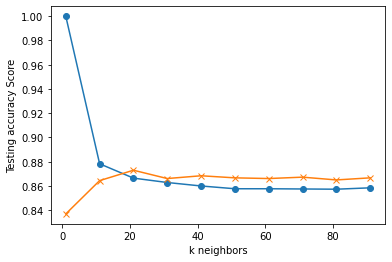

In [11]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
train_scores = []
test_scores = []
for k in range(1, 100, 10):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    #print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1, 100, 10), train_scores, marker='o')
plt.plot(range(1, 100, 10), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()


In [12]:
# Note that k: 32 seems to be the best choice for this dataset
# knn = KNeighborsClassifier(n_neighbors=32)
# knn.fit(X_train_scaled, y_train)
# print('k=32 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

In [13]:
#knn.fit(X_train_scaled, y_train)

In [18]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV

# # Set parameters
# param_grid = {'leaf_size': [1], 'n_neighbors': [33], 'p': [1],
#              'algorithm': ['auto']} #0.8622936056877144
# grid = GridSearchCV(knn, param_grid, verbose=3)

In [15]:
# Train the model with GridSearch
# grid.fit(X_train_scaled,y_train)

In [16]:
# print(grid.best_params_)
# print(grid.best_score_)
# all 40 columns {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 33, 'p': 1}
#0.8622936056877144

In [21]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,50))
p=[1,10]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size)#, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train_scaled,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 2
Best n_neighbors: 5


# Save the Model

In [ ]:
import joblib
filename = 'Model_Files/KNN.sav'
joblib.dump(grid, filename)